In [1]:
import sounddevice as sd 
print("Microphone (USB PnP Sound Devic, MME (2 in, 0 out)" in str(sd.query_devices()))
sd.query_devices()

False


   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone Array (AMD Audio Dev, MME (2 in, 0 out)
   2 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  3 Speakers (Senary Audio), MME (0 in, 2 out)
   4 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   5 Microphone Array (AMD Audio Device), Windows DirectSound (2 in, 0 out)
   6 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
   7 Speakers (Senary Audio), Windows DirectSound (0 in, 2 out)
   8 Speakers (Senary Audio), Windows WASAPI (0 in, 2 out)
   9 Microphone Array (AMD Audio Device), Windows WASAPI (2 in, 0 out)
  10 Speakers (Senary Audio output), Windows WDM-KS (0 in, 2 out)
  11 Microphone Array (AMDAfdInstall Wave Microphone - 0), Windows WDM-KS (2 in, 0 out)
  12 Headphones (), Windows WDM-KS (0 in, 2 out)
  13 Headset (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Ortizan X10)), Windows WDM-KS (0 in, 1 out)
  14 Headset (@System32\drivers\bthhfenum.sys,#2;%1 Hands-Free%0
;(Orti

In [1]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
sound = AudioSegment.from_wav(r"D:\CaesarAudioWAVs\Computer_science\meal_machines.wav")
duration  = sound.duration_seconds //60 
# 7 seconds - 3 minutes
#print(duration)

minute_intervals =  0.5#or 0.50 # TODO Try 1,2 and 3 and see which is the most optimized by seeing themost words/letters collected.
percentages = [i * (minute_intervals/duration) for i in range(0,int(duration//minute_intervals))]
#print(percentages)
#percentages = [i/20 for i in range(0,20)]# 0.8
folder_name = "audio-chunks"
amount = 3
# TODO Maximum audio time is 3.8 minutes, using percentage may be inconsistent if the audio duration increases.
slicedsections =  [ sound[round(percentages[i] * len(sound)):round(percentages[i+1] * len(sound))] for i in range(len(percentages)-1) ]
#print(slicedsections[0])
for ind in range(amount):
    audio_chunk = slicedsections[ind]

    audio_chunk.export(f"meal_machines_analysis{ind}.wav", format="wav")

d:\CaesarAI\caesaraienv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


C:\Users\amari\AppData\Local\Temp\ipykernel_10688\1087656711.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


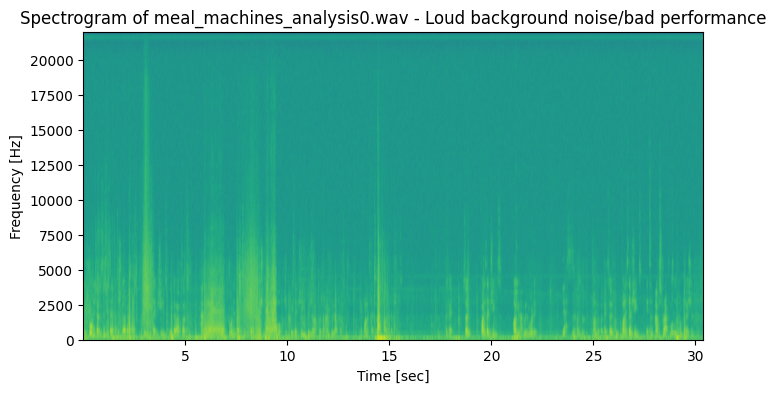

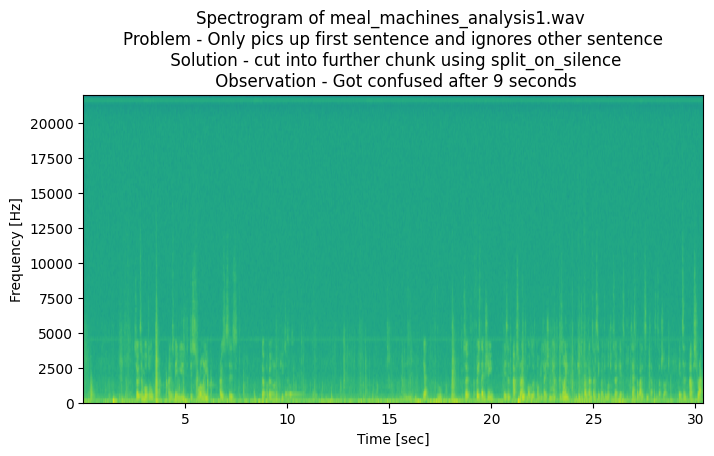

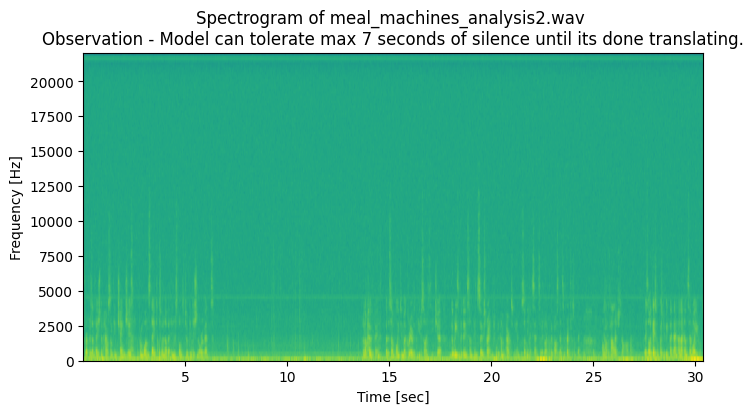

In [2]:
import os
import wave

import pylab
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate
def graph_spectrogram(wav_file,ind):
    sound_info, frame_rate = get_wav_info(wav_file)
    if ind == 0:
        conclusion = "- Loud background noise/bad performance"
    elif ind == 1:
        conclusion = "\nProblem - Only pics up first sentence and ignores other sentence\n Solution - cut into further chunk using split_on_silence\n Observation - Got confused after 9 seconds"
    elif ind == 2:
        conclusion = "\nObservation - Model can tolerate max 7 seconds of silence until its done translating."

    else:
        conclusion = ""
    pylab.figure(num=None, figsize=(8, 4))
    pylab.subplot(111)
    pylab.ylabel('Frequency [Hz]')
    pylab.xlabel('Time [sec]')
    pylab.title(f'Spectrogram of {wav_file[wav_file.rfind("/")+1:]} {conclusion}')
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig(f'spectrogram{ind}.png')
for i in range(amount):
    graph_spectrogram(f"D:/CaesarAI/Caesar Analysis/meal_machines_analysis{i}.wav",i)


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()
sentences = []
for ind in range(amount):
    with sr.AudioFile(f"meal_machines_analysis{ind}.wav") as source:
        # listen for the data (load audio to memory)
        audio_data = r.record(source)
        # recognize (convert from speech to text)
        text = r.recognize_google(audio_data)
        sentences.append(text.capitalize())
for sent in sentences:
    print(sent)
    print()
        #print(text)


In [1]:
import re
import nltk

with open(r"D:\CaesarNotes\Computer_science\meal_machines.txt")as f:
    article_text = f.read()
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
sentence_list = nltk.sent_tokenize(article_text)

stopwords = nltk.corpus.stopwords.words('english')

word_frequencies = {}
for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

sentence_scores = {}
for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]
import heapq
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)

summary = ' '.join(summary_sentences)
print(summary)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\amari/nltk_data'
    - 'd:\\CaesarAI\\caesaraienv\\nltk_data'
    - 'd:\\CaesarAI\\caesaraienv\\share\\nltk_data'
    - 'd:\\CaesarAI\\caesaraienv\\lib\\nltk_data'
    - 'C:\\Users\\amari\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
